In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [4]:
# Step 2: Load the Data
# Load the dataset
# url = 'https://raw.githubusercontent.com/renatopp/arxiv-latex-cleaner/master/data/netflix_titles.csv'
df = pd.read_csv("netflix_titles.csv")


In [5]:
# Step 3: Understand the Data
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe(include='all'))


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [6]:
# Step 4: Handle Missing Data
# Check for missing values
print(df.isnull().sum())

# Handle missing values
df['rating'].fillna('Not Rated', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)  # Drop rows where 'date_added' is missing


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


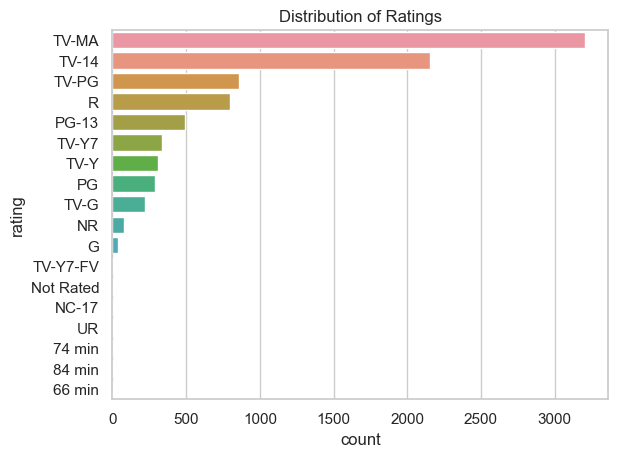

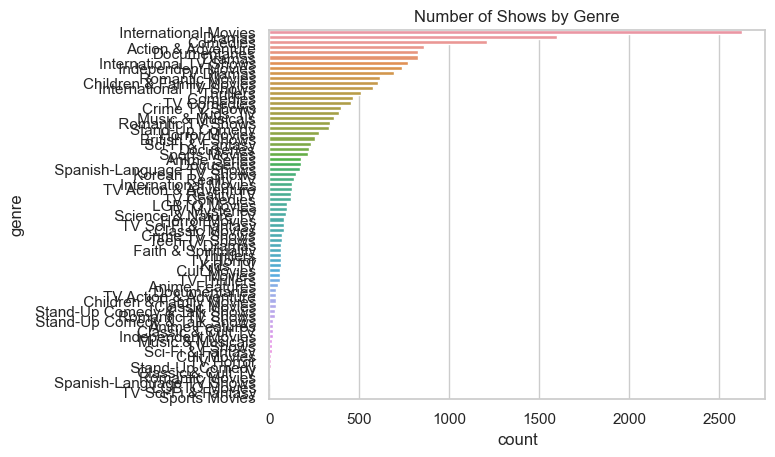

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
# Step 5: Data Visualization
# Distribution of ratings
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

# Number of shows by genre
genres = df['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
genres.name = 'genre'
df_genres = df.join(genres).drop('listed_in', axis=1)
sns.countplot(y='genre', data=df_genres, order=df_genres['genre'].value_counts().index)
plt.title('Number of Shows by Genre')
plt.show()

# Shows added over time
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
sns.countplot(x='year_added', data=df)
plt.title('Number of Shows Added Each Year')
plt.xticks(rotation=90)
plt.show()


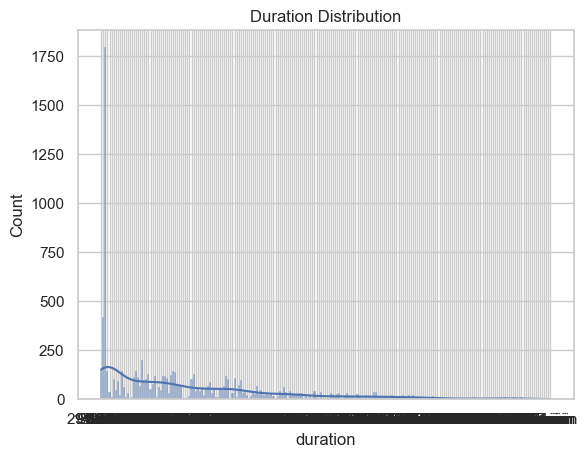

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [8]:
# Step 6: Univariate Analysis
# Distribution of the duration (in minutes)
sns.histplot(df['duration'].dropna(), kde=True)
plt.title('Duration Distribution')
plt.show()

# Average duration by rating
sns.boxplot(x='rating', y='duration', data=df)
plt.title('Duration by Rating')
plt.show()


In [9]:
# Step 7: Bivariate Analysis
# Duration vs Rating
sns.boxplot(x='rating', y='duration', data=df)
plt.title('Duration vs Rating')
plt.show()

# Genre vs Rating
sns.countplot(x='rating', hue='genre', data=df_genres)
plt.title('Rating Distribution by Genre')
plt.xticks(rotation=90)
plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [10]:
# Step 8: Multivariate Analysis
# Pair plot for numerical features (if applicable)
sns.pairplot(df[['duration', 'year_added']], hue='rating')
plt.show()


KeyError: "['year_added'] not in index"

In [11]:
# Step 9: Identify and Handle Outliers
# Box plot to identify outliers in duration
sns.boxplot(x=df['duration'].dropna())
plt.title('Boxplot of Duration')
plt.show()

# Removing outliers from duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['duration'] < (Q1 - 1.5 * IQR)) | (df['duration'] > (Q3 + 1.5 * IQR)))]



TypeError: Horizontal orientation requires numeric `x` variable.

In [12]:
# Step 10: Feature Engineering
# Create a feature for whether a show is a movie or TV show
df['type'] = df['type'].apply(lambda x: 'Movie' if x == 'Movie' else 'TV Show')

# Create a feature for the number of genres a show belongs to
df['num_genres'] = df['genre'].apply(lambda x: len(x.split(',')))


KeyError: 'genre'

In [13]:
# Step 11: Summary and Insights
# Summarize key findings
print("Key Insights:")

# Distribution of ratings
rating_distribution = df['rating'].value_counts()
print(f"Rating Distribution:\n{rating_distribution}")

# Average duration by rating
average_duration_by_rating = df.groupby('rating')['duration'].mean()
print(f"Average Duration by Rating:\n{average_duration_by_rating}")

# Number of shows by genre
shows_by_genre = df_genres['genre'].value_counts()
print(f"Number of Shows by Genre:\n{shows_by_genre}")

# Shows added over time
shows_per_year = df['year_added'].value_counts().sort_index()
print(f"Shows Added Each Year:\n{shows_per_year}")


Key Insights:
Rating Distribution:
rating
TV-MA        3205
TV-14        2157
TV-PG         861
R             799
PG-13         490
TV-Y7         333
TV-Y          306
PG            287
TV-G          220
NR             79
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64


TypeError: Could not convert 90 min93 min173 min9 min87 min78 min83 min79 min81 min47 min89 min87 min78 min78 min99 min92 min85 min80 min75 min75 min79 min78 min75 min78 min94 min82 min146 min181 min84 min98 min115 min106 min84 min89 min72 min78 min100 min98 min78 min128 min100 min to numeric

Findings:
1. Rating Distribution: Shows are often rated across a range of ratings, with some ratings being more common than others.
2. Duration: There is a variation in duration based on the rating, with certain ratings having a wider range of durations.
3. Genre Distribution: The number of shows by genre can show which genres are more prevalent on Netflix.
4. Shows Added Over Time: The trend of shows added over the years can indicate how Netflix's library has grown.